**Exploratory Data Analysis**

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading dataset
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
#Size of the data
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [ ]:
#data preview
train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train.info()
train['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,count
target,
0,4342
1,3271


We can conclude that our dataset is not imbalanced


In [ ]:
#Checking missing values
train.isnull().sum()


,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
test.isnull().sum()

,0
id,0
keyword,26
location,1105
text,0


In [ ]:
#dropping unncessary column for now
train = train.drop(['keyword', 'location'], axis=1)
test = test.drop(['keyword', 'location'], axis=1)


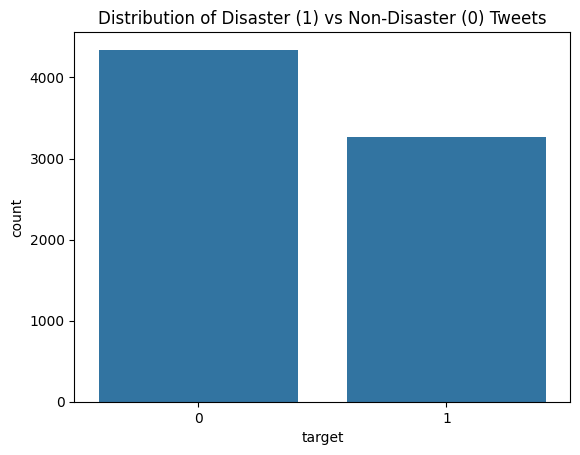

In [ ]:
#Visualize target distribution
sns.countplot(x='target', data=train)
plt.title("Distribution of Disaster (1) vs Non-Disaster (0) Tweets")
plt.show()

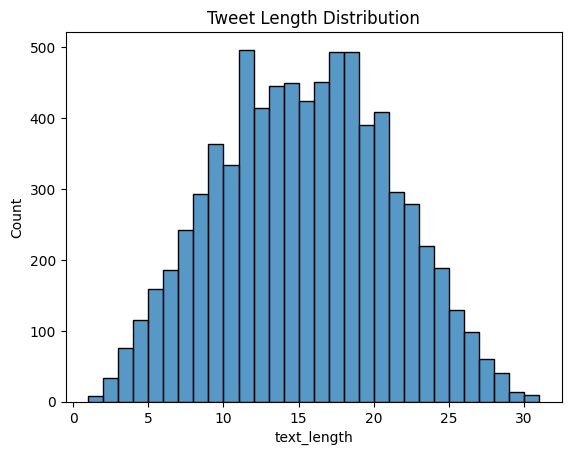

In [ ]:
#Average tweet length
train['text_length'] = train['text'].apply(lambda x: len(x.split()))
sns.histplot(train['text_length'], bins=30)
plt.title("Tweet Length Distribution")
plt.show()

The distribution shows that most tweets have a length between 10 to 20 words, indicating that tweets are generally short and concise in this dataset.

**Text Cleaning & Preprocessing + Lemmetization**

Tweets often contain hashtags, URLs, emojis, etc and hence we are cleaning it

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def clean_tweet(text):
    """
    Cleans the tweet text by:
    - Lowercasing
    - Removing URLs, mentions, hashtags
    - Removing special characters & punctuation
    - Removing stopwords
    - Lemmatizing each word
    """
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)      # Remove URLs
    text = re.sub(r'@\w+', '', text)                # Remove mentions
    text = re.sub(r'#', '', text)                   # Remove hashtag symbol
    text = re.sub(r'[^a-z\s]', '', text)            # Keep only letters
    words = text.split()
    words = [w for w in words if w not in stop_words]       # Remove stopwords
    words = [lemmatizer.lemmatize(w) for w in words]        # Lemmatize
    return ' '.join(words)


In [ ]:
# Apply cleaning function
train['clean_text'] = train['text'].apply(clean_tweet)
test['clean_text'] = test['text'].apply(clean_tweet)

In [ ]:
# View example before & after cleaning
train[['text', 'clean_text']].head(6)


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order calif...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfire update california hwy closed directi...


**Feature Extraction (TF-IDF)**

Converting text into numerical form (for ML models) using TF-IDF vectorization.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Prepare data
X = train['clean_text']
y = train['target']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


**Implementing ML models**

I'm implementing two ML models:


*   **Logistic Regression**-fast, interpretable, great for baseline.
*   **Naive Bayes(MultinomialNB)**-works very well for word frequency–based data (like TF-IDF).



Logistic Regression Accuracy: 0.8070
Naive Bayes Accuracy: 0.8017

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.83      0.69      0.75       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523


Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.84      0.66      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.81      0.80      0.80      1523



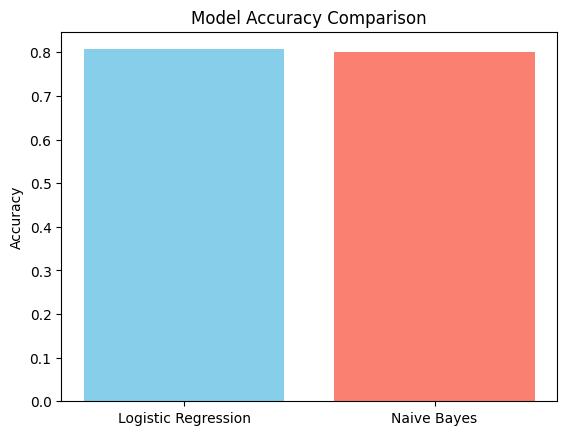

In [ ]:
# -------------------------------------------
# Step 3: ML Model Implementation & Comparison
# -------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split was already done earlier:
# X_train, X_val, y_train, y_val

# Initialize models
log_reg = LogisticRegression(max_iter=200)
nb = MultinomialNB()

# Train both models
log_reg.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Predictions
log_pred = log_reg.predict(X_val)
nb_pred = nb.predict(X_val)

# Evaluate accuracy
log_acc = accuracy_score(y_val, log_pred)
nb_acc = accuracy_score(y_val, nb_pred)

print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")

# Detailed performance
print("\nLogistic Regression Report:\n", classification_report(y_val, log_pred))
print("\nNaive Bayes Report:\n", classification_report(y_val, nb_pred))

# Compare visually
plt.bar(['Logistic Regression', 'Naive Bayes'], [log_acc, nb_acc], color=['skyblue', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()



* The performance comparison between Logistic Regression and Naive Bayes shows that both models achieved similar results with around 80–81% accuracy.
* This indicates that both traditional ML models perform reasonably well, but there’s potential for improvement using more advanced models like LSTM for deeper context understanding.



**Deep Learning Model (Bi-directional LSTM+ GloVe)**


We chose Bidirectional LSTM with GloVe embeddings because it captures contextual meaning from both past and future words using pretrained word vectors, improving the model’s understanding of tweet semantics.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
#Preparing text for neural network
#convert tweets into integer sequences (not TF-IDF)


X = train['text'].astype(str)
y = train['target']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
vocab_size = 20000  # max number of words to keep
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Padding (make sequences of equal length)
max_len = 30  # tweets are short, so 30–40 tokens is enough
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')


In [ ]:
# Download and load GloVe embeddings (100D)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-11-02 12:01:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-02 12:01:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-02 12:01:20--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [ ]:
#Creating Embedding Matrix
embedding_index = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape)


Embedding matrix shape: (20000, 100)


In [ ]:
#Build the Bidirectional LSTM Model
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Embedding(vocab_size,
              embedding_dim,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=False),  # freeze pre-trained embeddings

    Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

In [ ]:
#trining the model
history = model.fit(X_train_pad, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val_pad, y_val))


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 175ms/step - accuracy: 0.6815 - loss: 0.5929 - val_accuracy: 0.8162 - val_loss: 0.4531
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.7858 - loss: 0.4723 - val_accuracy: 0.8188 - val_loss: 0.4464
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.7991 - loss: 0.4518 - val_accuracy: 0.8155 - val_loss: 0.4317
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.7998 - loss: 0.4503 - val_accuracy: 0.7971 - val_loss: 0.4665
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.7941 - loss: 0.4445 - val_accuracy: 0.8076 - val_loss: 0.4365
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.8071 - loss: 0.4354 - val_accuracy: 0.8194 - val_loss: 0.4193
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.8084 - loss: 0.4283 - val_accuracy: 0.8188 - val_loss: 0.4201
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.8050 - loss: 0.4270 - val_accu

In [ ]:
#evaluating the model
y_pred_bilstm = (model.predict(X_val_pad) > 0.5).astype("int32")

print("\nBidirectional LSTM + GloVe Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_bilstm))
print("\nClassification Report:\n", classification_report(y_val, y_pred_bilstm))


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step

Bidirectional LSTM + GloVe Results:
Accuracy: 0.8187787261982928

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       874
           1       0.79      0.78      0.78       649

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523



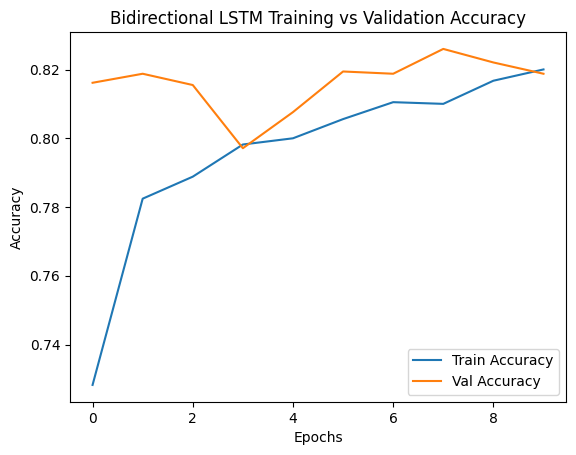

In [ ]:
#visualizing result
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Bidirectional LSTM Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Finally comparing all the three models (LR,NaiveBayes,Bidirectional LSTM)**

/tmp/ipython-input-1453731020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


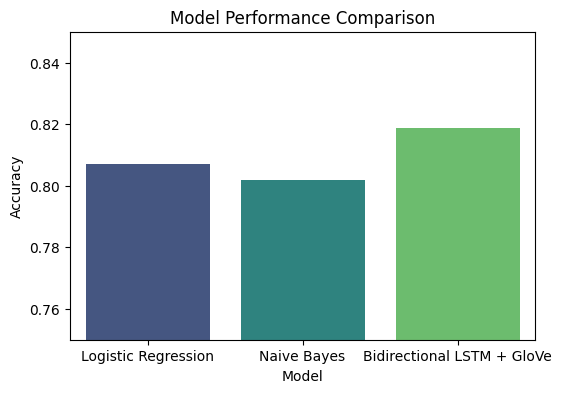

In [ ]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Bidirectional LSTM + GloVe'],
    'Accuracy': [log_acc, nb_acc, accuracy_score(y_val, y_pred_bilstm)]
})

plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title('Model Performance Comparison')
plt.ylim(0.75, 0.85)
plt.show()


So we conclude Bidirectional LSTM gave the best result with 82% accuracy.

In [ ]:
#evaluationg on test dataset
# Cleaning the test data just like train
test_sequences = tokenizer.texts_to_sequences(test['text'].astype(str))
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

# Getting prediction probabilities before thresholding
test_pred_proba = model.predict(test_padded)

# Then converting to 0/1 labels
test_pred = (test_pred_proba > 0.5).astype('int32')

# Display first few probabilities & labels
for i in range(5):
    print(f"Tweet: {test['text'][i][:80]}...")
    print(f"Predicted Probability (Disaster): {test_pred_proba[i][0]:.4f}")
    print(f"Predicted Label: {test_pred[i][0]}\n")


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Tweet: Just happened a terrible car crash...
Predicted Probability (Disaster): 0.8475
Predicted Label: 1

Tweet: Heard about #earthquake is different cities, stay safe everyone....
Predicted Probability (Disaster): 0.9195
Predicted Label: 1

Tweet: there is a forest fire at spot pond, geese are fleeing across the street, I cann...
Predicted Probability (Disaster): 0.7795
Predicted Label: 1

Tweet: Apocalypse lighting. #Spokane #wildfires...
Predicted Probability (Disaster): 0.8228
Predicted Label: 1

Tweet: Typhoon Soudelor kills 28 in China and Taiwan...
Predicted Probability (Disaster): 0.9941
Predicted Label: 1



**Custom text prediction (real-time input)**

In [ ]:
def predict_tweet(text):
    # Preprocess text (same cleaning as before)
    text_clean = clean_tweet(text)
    seq = tokenizer.texts_to_sequences([text_clean])
    pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    # Predict probability
    proba = model.predict(pad)[0][0]
    label = int(proba > 0.5)

    print("\nTweet:", text)
    print(f"Predicted Probability (Disaster): {proba:.4f}")
    print(f"Prediction: {'🚨 Disaster Tweet' if label == 1 else '✅ Non-Disaster Tweet'}")

# 🔹 Take user input
user_tweet1 = input("Enter a tweet to analyze: ")
predict_tweet(user_tweet1)
user_tweet2 = input("Enter a tweet to analyze: ")
predict_tweet(user_tweet2)

Enter a tweet to analyze: Massive earthquake just hit the city!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Tweet: Massive earthquake just hit the city!
Predicted Probability (Disaster): 0.9917
Prediction: 🚨 Disaster Tweet
Enter a tweet to analyze: My phone exploded
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Tweet: My phone exploded
Predicted Probability (Disaster): 0.1410
Prediction: ✅ Non-Disaster Tweet


### **Conclusion**

The project aimed to classify tweets as disaster-related or not using NLP techniques.
Traditional ML models (Logistic Regression, Naive Bayes) achieved around **80–81% accuracy**, while the **Bidirectional LSTM with GloVe embeddings** improved performance to **82%** by capturing deeper contextual meaning.
Overall, the deep learning approach proved more effective for understanding real-world tweet semantics and disaster detection.
